Test whether the core functions are working properly.

In [1]:
import matplotlib.pyplot as plt
# %load_ext autoreload
# %autoreload 2

In [2]:
from core import pds
import numpy as np
from datetime import timedelta

In [3]:
# pds frame definition
pds1d_frame = pds.PDS1D_SingleSource()

In [4]:
# setup mesh
nx = 100
dx = 1
x = np.arange(0, nx * dx, dx)

d = 2
u_init = np.zeros(nx)
t0 = 0
lbc = 'Neumann'
rbc = 'Neumann'

In [5]:
# Load test data
from DSS_analyzer_Mariner import Data1D_GAUGE
test_gauge_dataframe = Data1D_GAUGE.Data1D_GAUGE('testdata/pressure_gauge_data.npz')

from DSS_analyzer_Mariner import Data1D_PumpingCurve
stage4_pumping_curve_dataframe = Data1D_PumpingCurve.Data1D_PumpingCurve('testdata/pumping_curve_stage4.npz')
stage5_pumping_curve_dataframe = Data1D_PumpingCurve.Data1D_PumpingCurve('testdata/pumping_curve_stage5.npz')

In [6]:
# Crop the gauge data into three parts
start_time_stg4 = stage4_pumping_curve_dataframe.get_start_time()
end_time_stg4 = stage4_pumping_curve_dataframe.get_end_time()

start_time_stg5 = stage5_pumping_curve_dataframe.get_start_time()
end_time_stg5 = stage5_pumping_curve_dataframe.get_end_time()

In [7]:
stg4_pg_dataframe = test_gauge_dataframe.copy()
stg4_pg_dataframe.crop(start_time_stg4, end_time_stg4)

In [8]:
interval_pg_dataframe = test_gauge_dataframe.copy()
interval_pg_dataframe.crop(end_time_stg4, start_time_stg5)

In [9]:
stg5_pg_dataframe = test_gauge_dataframe.copy()
stg5_pg_dataframe.crop(start_time_stg5, end_time_stg5)

In [10]:
# pass the parameters
pds1d_frame.set_mesh(x)
pds1d_frame.set_diffusivity(d)
pds1d_frame.set_bcs(lbc, rbc)
pds1d_frame.set_t0(t0)
pds1d_frame.set_sourceidx(int(len(x) / 2)) # set the source index at the middle of the mesh

Diffusivity is a single scalar value, broadcasted to the mesh length.


In [11]:
total_simulation_time = 1000

In [12]:
# For the test purpose, crop the gauge data
test_gauge_dataframe = stg4_pg_dataframe.copy()
# decide the time range
test_start_time = start_time_stg4 + timedelta(seconds = 200)
test_end_time = test_start_time + timedelta(seconds = total_simulation_time)
test_gauge_dataframe.crop(test_start_time, test_end_time)

In [13]:
# pass the gauge data
pds1d_frame.set_source(test_gauge_dataframe)

In [14]:
u_init[:] =  test_gauge_dataframe.data[0]
pds1d_frame.set_initial(u_init)

In [15]:
# Test snapshot
pds1d_frame.solve(optimizer= False, dt = 5, t_total= total_simulation_time, print_progress=False)

Time array generated using t_total.
Problem solved.


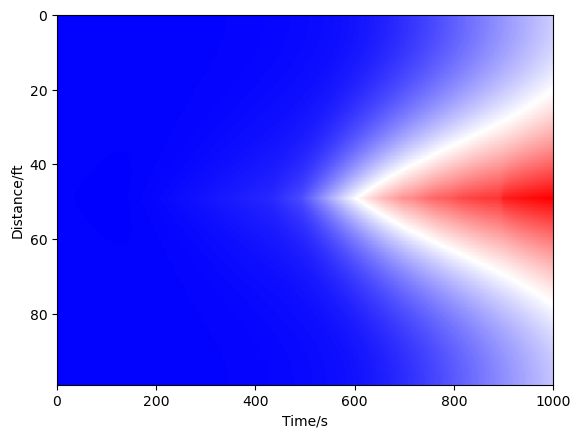

In [16]:
pds1d_frame.plot_solution()

In [17]:
import matplotlib.pyplot as plt

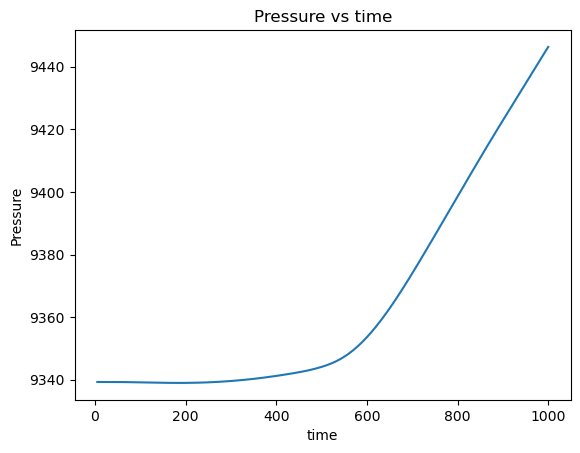

In [18]:
plt.figure()
plt.plot(pds1d_frame.taxis[1:], pds1d_frame.get_val_at_idx(20)[1:])
plt.xlabel("time")
plt.ylabel("Pressure")
plt.title("Pressure vs time")
plt.show()

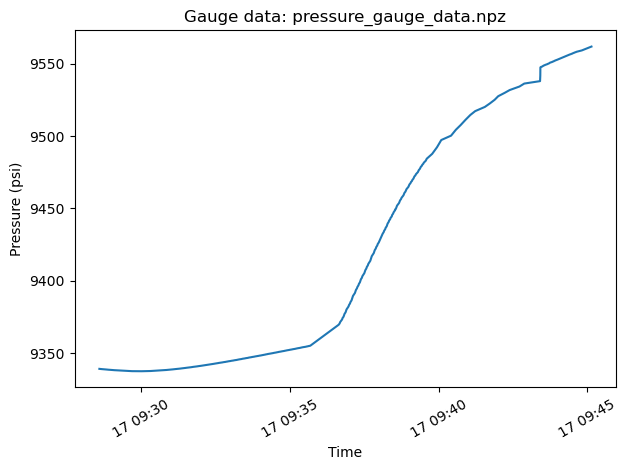

In [19]:
test_gauge_dataframe.plot_simple()